<center><h1>Haidar_Anastasia_HW4</h1></center>
<br>
<br>

Name: Anastasia Haidar
<br>
Github Username: haidarnastya
<br>
USC ID: 1163-9833-46

## 1. Time Series Classification Part 1: Feature Creation/Extraction (HW3 Rerun)

### (a) Obtain Data

Import packages

In [71]:
import pandas as pd
import numpy as np
import zipfile
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import StratifiedKFold, cross_val_score
import statsmodels.api as sm
from sklearn.utils import resample
from sklearn.feature_selection import RFE
from sklearn.metrics import balanced_accuracy_score

Get the AReM Data Set

In [2]:
zip_path = './data/AReM.zip'

dataframes = {}

#open the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    #loop through all files in zip subfolders
    for file_name in zip_ref.namelist():
        if file_name.endswith('.csv'):
            print(f"Reading: {file_name}")
            
            #read the csv file
            with zip_ref.open(file_name) as file:
                try:
                    #define col names
                    columns_names = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
                    #read csv with col names
                    df = pd.read_csv(io.BytesIO(file.read()), comment='#', header=None, names=columns_names, on_bad_lines='skip')
                    
                    #store in dataframe dictionary
                    dataframes[file_name] = df

                    print(f" Shape: {df.shape}")
                    print(f" Columns: {list(df.columns)}\n")

                except Exception as e:
                    print(f" Error reading {file_name}: {e}\n")
                    continue

Reading: lying/dataset1.csv
 Shape: (480, 7)
 Columns: ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

Reading: lying/dataset2.csv
 Shape: (480, 7)
 Columns: ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

Reading: lying/dataset3.csv
 Shape: (480, 7)
 Columns: ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

Reading: lying/dataset4.csv
 Shape: (480, 7)
 Columns: ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

Reading: lying/dataset5.csv
 Shape: (480, 7)
 Columns: ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

Reading: lying/dataset6.csv
 Shape: (480, 7)
 Columns: ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

Reading: lying/dataset7.csv
 Shape: (480, 7)
 Columns: ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']


### (b) Splitting Data

In [3]:
#test data
bending1_ds1 = dataframes['bending1/dataset1.csv']
bending1_ds2 = dataframes['bending1/dataset2.csv']

bending2_ds1 = dataframes['bending2/dataset1.csv']
bending2_ds2 = dataframes['bending2/dataset2.csv']

lying_ds1 = dataframes['lying/dataset1.csv']
lying_ds2 = dataframes['lying/dataset2.csv']
lying_ds3 = dataframes['lying/dataset3.csv']

cycling_ds1 = dataframes['cycling/dataset1.csv']
cycling_ds2 = dataframes['cycling/dataset2.csv']
cycling_ds3 = dataframes['cycling/dataset3.csv']

sitting_ds1 = dataframes['sitting/dataset1.csv']
sitting_ds2 = dataframes['sitting/dataset2.csv']
sitting_ds3 = dataframes['sitting/dataset3.csv']

standing_ds1 = dataframes['standing/dataset1.csv']
standing_ds2 = dataframes['standing/dataset2.csv']
standing_ds3 = dataframes['standing/dataset3.csv']

walking_ds1 = dataframes['walking/dataset1.csv']
walking_ds2 = dataframes['walking/dataset2.csv']
walking_ds3 = dataframes['walking/dataset3.csv']

test_data = pd.concat([
    bending1_ds1, bending1_ds2,
    bending2_ds1, bending2_ds2,
    lying_ds1, lying_ds2, lying_ds3,
    cycling_ds1, cycling_ds2, cycling_ds3,
    sitting_ds1, sitting_ds2, sitting_ds3,
    standing_ds1, standing_ds2, standing_ds3,
    walking_ds1, walking_ds2, walking_ds3
], ignore_index=True)

test_files = ['bending1/dataset1.csv', 'bending1/dataset2.csv',
              'bending2/dataset1.csv', 'bending2/dataset2.csv',
              'lying/dataset1.csv', 'lying/dataset2.csv', 'lying/dataset3.csv',
              'cycling/dataset1.csv', 'cycling/dataset2.csv', 'cycling/dataset3.csv',
              'sitting/dataset1.csv', 'sitting/dataset2.csv', 'sitting/dataset3.csv',
              'standing/dataset1.csv', 'standing/dataset2.csv', 'standing/dataset3.csv',
              'walking/dataset1.csv', 'walking/dataset2.csv', 'walking/dataset3.csv']

In [4]:
#training data
training_dataframes = []
for file_path, df in dataframes.items():
    if file_path not in test_files:
        training_dataframes.append(df)

training_data = pd.concat(training_dataframes, ignore_index=True)
print(training_data.head())

   time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0     0       48.0        0.0        9.0       0.00       9.25       0.43
1   250       48.0        0.0        9.0       0.00       9.50       0.50
2   500       48.0        0.0       10.0       0.71      10.00       0.71
3   750       48.0        0.0        9.5       0.50       9.50       0.50
4  1000       48.0        0.0       10.0       0.00      10.00       1.00


### (c) Feature Extraction

In [5]:
#clean data
training_data = training_data.dropna()
test_data = test_data.dropna()


#identify feature columns
feature_columns = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

def extract_features(instance_df):
    #extract time domain features: min, max, mean, median, std, first quartile, third quartile
    features = []

    for column in feature_columns:
        time_series = instance_df[column]
        features.extend([time_series.min(), time_series.max(), time_series.mean(), time_series.median(), time_series.std(), time_series.quantile(0.25), time_series.quantile(0.75)])
    return features

#build feature dataframe
feature_rows = []
instance_ids = []
file_paths = []

for file_name, instance_df in dataframes.items():
    #extract features for each instance
    features = extract_features(instance_df)
    feature_rows.append(features)
    
    #store instance names
    instance_id = file_name.split('/')[0]
    instance_ids.append(instance_id)
    file_paths.append(file_name)

#create column names for each feature
feature_names = []
for i in range(1,7):
    feature_names.extend([f'min{i}', f'max{i}', f'mean{i}', f'median{i}', f'std{i}', f'q1_{i}', f'q3_{i}'])
    
#final dataframe
features_df = pd.DataFrame(feature_rows, columns=feature_names)
features_df.insert(0, 'Instance', instance_ids)
features_df.insert(1, 'File Path', file_paths)

print(features_df.head())
print(features_df.shape)

  Instance           File Path   min1   max1      mean1  median1      std1  \
0    lying  lying/dataset1.csv  23.50  30.00  27.716375     27.5  1.442253   
1    lying  lying/dataset2.csv  24.75  48.33  44.182937     48.0  7.495615   
2    lying  lying/dataset3.csv  48.00  48.25  48.004167     48.0  0.032038   
3    lying  lying/dataset4.csv  34.00  51.00  42.706063     40.5  3.537476   
4    lying  lying/dataset5.csv  39.00  41.00  39.667833     39.5  0.280158   

    q1_1   q3_1  min2  ...      std5    q1_5     q3_5  min6  max6     mean6  \
0  27.00  29.00   0.0  ...  4.074511  5.5000  10.7500   0.0  4.50  0.734271   
1  48.00  48.00   0.0  ...  3.274539  2.0000   5.5425   0.0  3.91  0.692771   
2  48.00  48.00   0.0  ...  3.268502  4.6700  10.0000   0.0  2.50  0.641229   
3  40.25  48.00   0.0  ...  4.253807  1.0000   8.0000   0.0  4.97  0.549312   
4  39.50  39.75   0.0  ...  4.097351  1.6275   9.3300   0.0  3.49  0.635938   

   median6      std6    q1_6  q3_6  
0     0.71  0.61368

In [74]:
std_features = features_df.drop(columns = ['Instance', 'File Path']).std()

#convert to dataframe
std_features_df = std_features.reset_index()
std_features_df.columns = ['Feature', 'Standard Deviation']

#bootstrapped confidence intervals
#remove columns that are not numeric
bootstrap_features = features_df.select_dtypes(include=[np.number])

#bootstrap parameters
n_bootstrap = 1000
ci_lower = 5
ci_upper = 95

#store results
bootstrap_results = {}

for feature in bootstrap_features.columns:
    bootstrap_std = []
    for _ in range(n_bootstrap):
        #sample with replacement
        sample = bootstrap_features[feature].sample(n=len(bootstrap_features), replace=True)
        #calculate standard deviation
        bootstrap_std.append(sample.std())

    #calculate confidence interval
    lower = np.percentile(bootstrap_std, ci_lower)
    upper = np.percentile(bootstrap_std, ci_upper)
    bootstrap_results[feature] = (lower, upper)

#final std df
bootstrap_ci_df = pd.DataFrame.from_dict(bootstrap_results, orient='index', columns=['Lower CI', 'Upper CI'])

bootstrap_ci_df = bootstrap_ci_df.reset_index()
bootstrap_ci_df.columns = ['Feature', 'Lower CI', 'Upper CI']

bootstrap_final = std_features_df.merge(bootstrap_ci_df, on='Feature')

print(bootstrap_final)

    Feature  Standard Deviation  Lower CI   Upper CI
0      min1            9.624011  8.331148  10.725869
1      max1            4.207745  3.210548   5.120089
2     mean1            5.276413  4.623726   5.811117
3   median1            5.386624  4.731417   5.927391
4      std1            1.771313  1.563100   1.935828
5      q1_1            6.128143  5.508301   6.653220
6      q3_1            5.031028  4.239455   5.803785
7      min2            0.000000  0.000000   0.000000
8      max2            5.059656  4.620392   5.399870
9     mean2            1.577941  1.384779   1.712700
10  median2            1.413593  1.236244   1.545794
11     std2            0.885907  0.803743   0.941660
12     q1_2            0.948434  0.839571   1.037393
13     q3_2            2.131469  1.905657   2.303515
14     min3            2.954516  2.756001   3.109017
15     max3            4.819848  4.097399   5.420752
16    mean3            3.976602  3.360139   4.478026
17  median3            4.009687  3.396375   4.

## 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

#### PLOTS


Confusion Matrix:
[[15  0]
 [ 2  2]]
Classification Report:
              precision    recall  f1-score   support

       Other       0.88      1.00      0.94        15
     Bending       1.00      0.50      0.67         4

    accuracy                           0.89        19
   macro avg       0.94      0.75      0.80        19
weighted avg       0.91      0.89      0.88        19



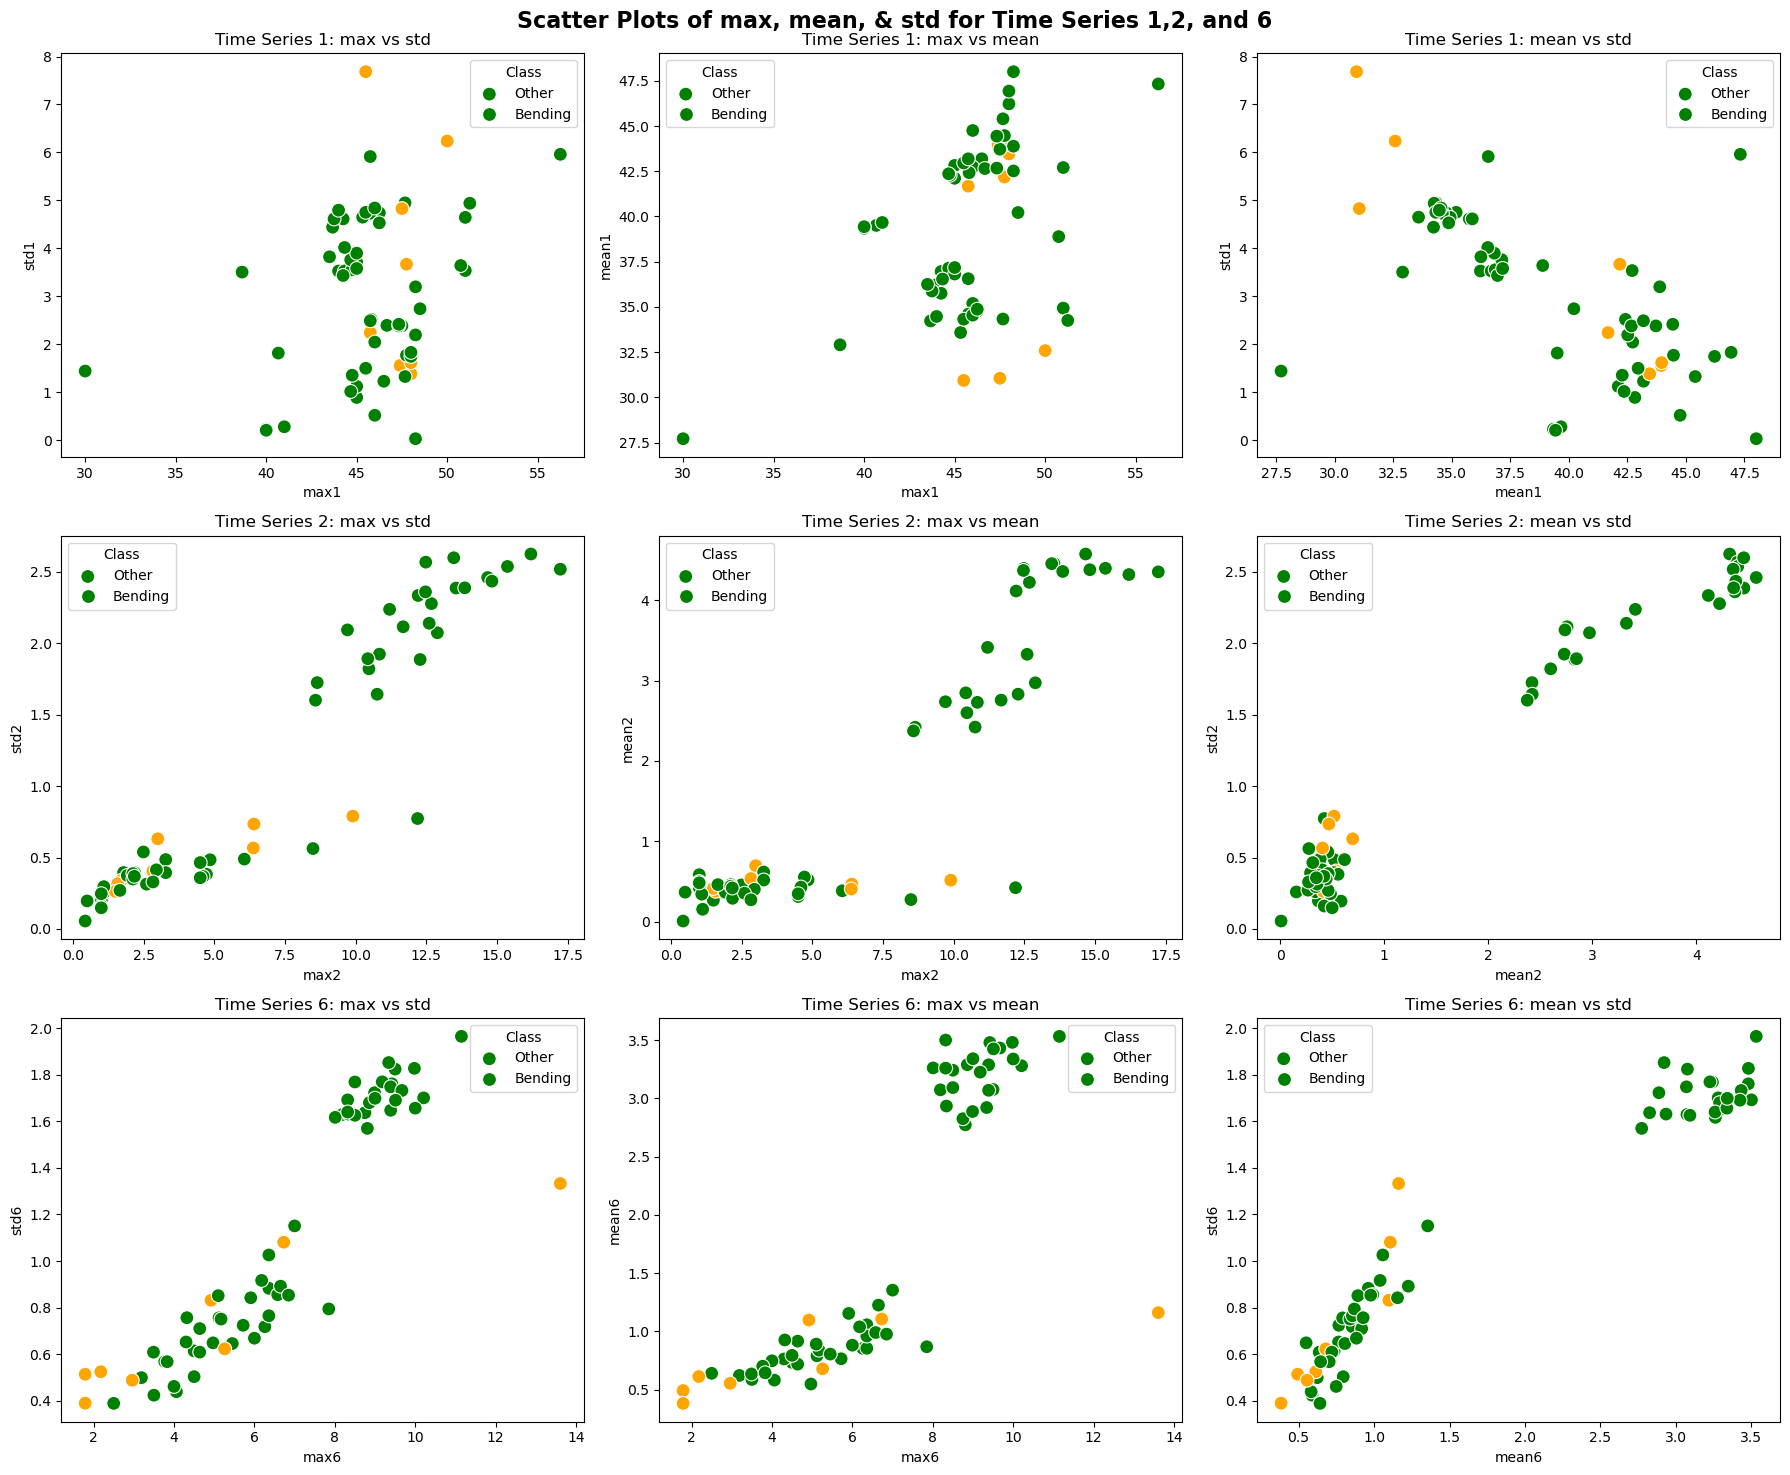

In [6]:
#Binary Classification Using Logistic Regression
#3Some logistic regression packages have a built-in L2 regularization. To remove the e
ect of L2 
#regularization, set lamba= 0 or set the budget C to infinity (i.e. a very large value).
#Assume that you want to use the training set to classify bending from other activities, 
#i.e. you have a binary classification problem. Depict scatter plots of the features you speci
ed 
#in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to 
#distinguish bending vs. other activities.

#select my 3 features: max, mean, std for time series 1,2, and 6
selected_features = ['max1', 'mean1', 'std1', 'max2', 'mean2', 'std2', 'max6', 'mean6', 'std6']

#new df for selected features
features_clean = features_df[selected_features + ['File Path', 'Instance']].copy()

#add label col (1 for bending, 0 for others)
features_clean['label'] = features_clean['Instance'].apply(lambda x: 1 if 'bending' in x else 0)

#separate training and test data
test_instances = features_clean['File Path'].isin(test_files)
training_data = features_clean[~test_instances].copy()
test_data = features_clean[test_instances].copy()

#remove any missing data
training_data = training_data.dropna()
test_data = test_data.dropna()

#split labels and features
x_train = training_data[selected_features].copy()
y_train = training_data['label'].copy()
x_test = test_data[selected_features].copy()
y_test = test_data['label'].copy()

###--------------------------------------------------------------------------###
#Logistic Regression Model (train w minimal L2 regularization)
log_reg = LogisticRegression(penalty='l2', C=1e10, solver='lbfgs', max_iter=1000)
log_reg.fit(x_train, y_train)

#Predict on test data
predict_y = log_reg.predict(x_test)

#confusion matrix
cm = confusion_matrix(y_test, predict_y)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, predict_y, target_names=['Other', 'Bending']))

##------------------------------------------------------------------------------##
#reshape data for plotting
color_palette = {0: 'green', 1: 'orange'}

fig, axes = plt.subplots(3,3, figsize=(18, 15))
fig.suptitle('Scatter Plots of max, mean, & std for Time Series 1,2, and 6', fontsize = 16, fontweight='bold')

#ts1
sns.scatterplot(data=training_data, x='max1', y='std1', hue='label', ax=axes[0,0], palette=color_palette, s = 100)
axes[0,0].set_title('Time Series 1: max vs std')
axes[0,0].legend(title='Class', labels=['Other', 'Bending'])

sns.scatterplot(data=training_data, x='max1', y='mean1', hue='label', ax=axes[0,1], palette=color_palette, s = 100)
axes[0,1].set_title('Time Series 1: max vs mean')
axes[0,1].legend(title='Class', labels=['Other', 'Bending'])

sns.scatterplot(data=training_data, x='mean1', y='std1', hue='label', ax=axes[0,2], palette=color_palette, s = 100)
axes[0,2].set_title('Time Series 1: mean vs std')
axes[0,2].legend(title='Class', labels=['Other', 'Bending'])

#ts2
sns.scatterplot(data=training_data, x='max2', y='std2', hue='label', ax=axes[1,0], palette=color_palette, s = 100)
axes[1,0].set_title('Time Series 2: max vs std')
axes[1,0].legend(title='Class', labels=['Other', 'Bending'])

sns.scatterplot(data=training_data, x='max2', y='mean2', hue='label', ax=axes[1,1], palette=color_palette, s = 100)
axes[1,1].set_title('Time Series 2: max vs mean')
axes[1,1].legend(title='Class', labels=['Other', 'Bending'])

sns.scatterplot(data=training_data, x='mean2', y='std2', hue='label', ax=axes[1,2], palette=color_palette, s = 100)
axes[1,2].set_title('Time Series 2: mean vs std')
axes[1,2].legend(title='Class', labels=['Other', 'Bending'])

#ts6
sns.scatterplot(data=training_data, x='max6', y='std6', hue='label', ax=axes[2,0], palette=color_palette, s = 100)
axes[2,0].set_title('Time Series 6: max vs std')
axes[2,0].legend(title='Class', labels=['Other', 'Bending'])

sns.scatterplot(data=training_data, x='max6', y='mean6', hue='label', ax=axes[2,1], palette=color_palette, s = 100)
axes[2,1].set_title('Time Series 6: max vs mean')
axes[2,1].legend(title='Class', labels=['Other', 'Bending'])

sns.scatterplot(data=training_data, x='mean6', y='std6', hue='label', ax=axes[2,2], palette=color_palette, s = 100)
axes[2,2].set_title('Time Series 6: mean vs std')
axes[2,2].legend(title='Class', labels=['Other', 'Bending'])

plt.tight_layout()
plt.show()


#### ii. Splitted Plots

Shape of split df: (88, 86)
training accuracy: 0.9264705882352942
test accuracy: 0.8421052631578947
Confusion Matrix: [[15  0]
 [ 3  1]]


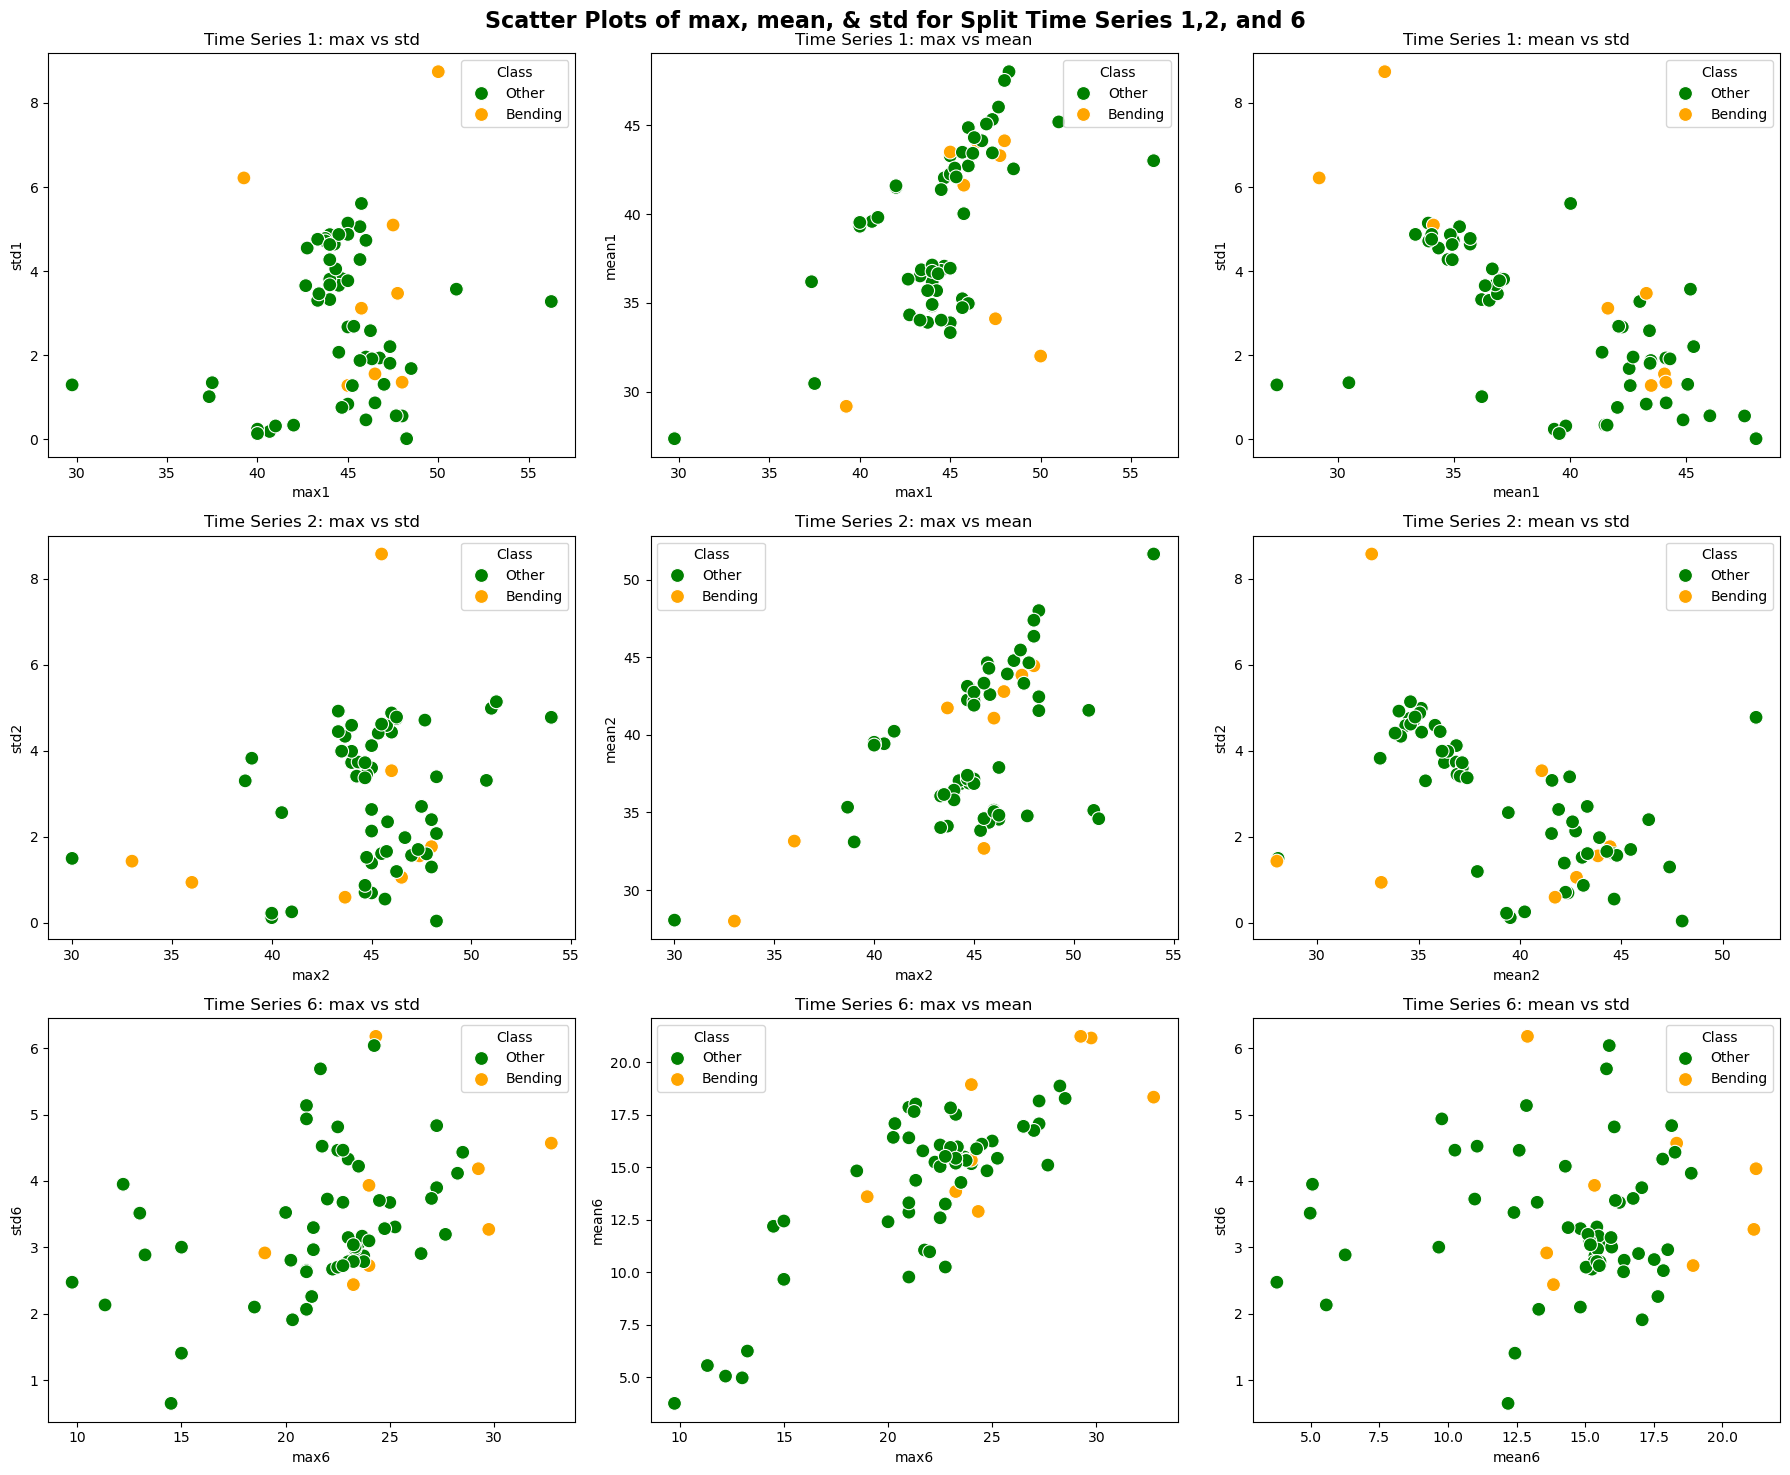

In [7]:
#Break each time series in your training set into two (approximately) equal
#length time series. Now instead of 6 time series for each of the training
#instances, you have 12 time series for each training instance. Repeat the
#experiment in 2(a)i, i.e depict scatter plots of the features extracted from both
#parts of the time series 1,2, and 6. Do you see any considerable di
erence in
#the results with those of 2(a)i?

#double time series
def extract_features_split(instance_df):
    features = []
    for column in feature_columns: 
        time_series = instance_df[column]

        #split the time series into two halves
        middle = len(time_series) // 2
        first_half = time_series.iloc[:middle]
        second_half = time_series.iloc[middle:]

        #extract first half
        features.extend([first_half.min(), first_half.max(), first_half.mean(), first_half.median(), first_half.std(), first_half.quantile(0.25), first_half.quantile(0.75)])

        #extract second half
        features.extend([second_half.min(), second_half.max(), second_half.mean(), second_half.median(), second_half.std(), second_half.quantile(0.25), second_half.quantile(0.75)])
    return features

#make new df with split time series
feature_rows_split = []
instance_ids_split = []
file_paths_split = []

for file_name, instance_df in dataframes.items():
    fts = extract_features_split(instance_df)
    feature_rows_split.append(fts)

    #store names and file paths
    instance_id = file_name.split('/')[0]
    instance_ids_split.append(instance_id)
    file_paths_split.append(file_name)

#column names for each feature of 12 time series
feature_names_split = []
for i in range (1,13): 
    feature_names_split.extend([f'min{i}', f'max{i}', f'mean{i}', f'median{i}', f'std{i}', f'q1_{i}', f'q3_{i}'])

#final df for split time series
split_df = pd.DataFrame(feature_rows_split, columns=feature_names_split)
split_df.insert(0, 'Instance', instance_ids_split)
split_df.insert(1, 'File Path', file_paths_split)

print("Shape of split df:", split_df.shape)

#-------------------------------------------------------------------------------------------#
selected_features_split = ['max1', 'mean1', 'std1', 'max2', 'mean2', 'std2', 'max6', 'mean6', 'std6']

#clean df
clean_split_df = split_df[selected_features_split + ['File Path', 'Instance']].copy()

clean_split_df['label'] = clean_split_df['Instance'].apply(lambda x: 1 if 'bending' in x else 0)

#split training and test data
test_instances_split = clean_split_df['File Path'].isin(test_files)
training_data_split = clean_split_df[~test_instances_split].copy()
test_data_split = clean_split_df[test_instances_split].copy()

#remove NaN vals
training_data_split = training_data_split.dropna()
test_data_split = test_data_split.dropna()

#logreg model
x_train_split = training_data_split[selected_features_split]
y_train_split = training_data_split['label']
x_test_split = test_data_split[selected_features_split]
y_test_split = test_data_split['label']

log_reg_split = LogisticRegression(penalty='l2', C=1e10, solver='lbfgs', max_iter=1000)
log_reg_split.fit(x_train_split, y_train_split)

#evaluate
train_accuracy_split = log_reg_split.score(x_train_split, y_train_split)
test_accuracy_split = log_reg_split.score(x_test_split, y_test_split)
print("training accuracy:", train_accuracy_split)
print("test accuracy:", test_accuracy_split)

y_pred_split = log_reg_split.predict(x_test_split)
#confusion matrix
cm_split = confusion_matrix(y_test_split, y_pred_split)
print("Confusion Matrix:", cm_split)

#------------------------------------------------------------------------------------------#
#create scatter plots
color_palette = {0: 'green', 1: 'orange'}

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Scatter Plots of max, mean, & std for Split Time Series 1,2, and 6', fontsize=16, fontweight='bold')

#ts1
sns.scatterplot(data=training_data_split, x='max1', y='std1', hue='label', ax=axes[0, 0], palette=color_palette, s=100)
axes[0, 0].set_title('Time Series 1: max vs std')
handles, _ = axes[0, 0].get_legend_handles_labels()
axes[0, 0].legend(handles, ['Other', 'Bending'], title='Class')

sns.scatterplot(data=training_data_split, x='max1', y='mean1', hue='label', ax=axes[0, 1], palette=color_palette, s=100)
axes[0, 1].set_title('Time Series 1: max vs mean')
handles, _ = axes[0, 1].get_legend_handles_labels()
axes[0, 1].legend(handles, ['Other', 'Bending'], title='Class')

sns.scatterplot(data=training_data_split, x='mean1', y='std1', hue='label', ax=axes[0, 2], palette=color_palette, s=100)
axes[0, 2].set_title('Time Series 1: mean vs std')
handles, _ = axes[0, 2].get_legend_handles_labels()
axes[0, 2].legend(handles, ['Other', 'Bending'], title='Class')

#ts2
sns.scatterplot(data=training_data_split, x='max2', y='std2', hue='label', ax=axes[1, 0], palette=color_palette, s=100)
axes[1, 0].set_title('Time Series 2: max vs std')
handles, _ = axes[1, 0].get_legend_handles_labels()
axes[1, 0].legend(handles, ['Other', 'Bending'], title='Class')

sns.scatterplot(data=training_data_split, x='max2', y='mean2', hue='label', ax=axes[1, 1], palette=color_palette, s=100)
axes[1, 1].set_title('Time Series 2: max vs mean')
handles, _ = axes[1, 1].get_legend_handles_labels()
axes[1, 1].legend(handles, ['Other', 'Bending'], title='Class')

sns.scatterplot(data=training_data_split, x='mean2', y='std2', hue='label', ax=axes[1, 2], palette=color_palette, s=100)
axes[1, 2].set_title('Time Series 2: mean vs std')
handles, _ = axes[1, 2].get_legend_handles_labels()
axes[1, 2].legend(handles, ['Other', 'Bending'], title='Class')

#ts6
sns.scatterplot(data=training_data_split, x='max6', y='std6', hue='label', ax=axes[2, 0], palette=color_palette, s=100)
axes[2, 0].set_title('Time Series 6: max vs std')
handles, _ = axes[2, 0].get_legend_handles_labels()
axes[2, 0].legend(handles, ['Other', 'Bending'], title='Class')

sns.scatterplot(data=training_data_split, x='max6', y='mean6', hue='label', ax=axes[2, 1], palette=color_palette, s=100)
axes[2, 1].set_title('Time Series 6: max vs mean')
handles, _ = axes[2, 1].get_legend_handles_labels()
axes[2, 1].legend(handles, ['Other', 'Bending'], title='Class')

sns.scatterplot(data=training_data_split, x='mean6', y='std6', hue='label', ax=axes[2, 2], palette=color_palette, s=100)
axes[2, 2].set_title('Time Series 6: mean vs std')
handles, _ = axes[2, 2].get_legend_handles_labels()
axes[2, 2].legend(handles, ['Other', 'Bending'], title='Class')

plt.tight_layout()
plt.show()


#### iii. Time Series Segments

In [8]:
#Break each time series in your training set into l={1,2,...,20} time series
#of approximately equal length and use logistic regression to solve the binary
#classification problem, using time-domain features. Remember that breaking
#each of the time series does not change the number of instances. It only
#changes the number of features for each instance. 
#-----------------------------------------------------------------------------------#

#extract features for each l- value time-series
def break_time_series_for_l(dataframes, feature_columns, l):
    #split time series into l parts, extract features for each part and return full df
    feature_parts_rows = []
    instance_parts_ids = []
    file_paths_parts = []

    for file_name, instance_df in dataframes.items():
        #extract features for each instance
        features = []

        for column in feature_columns:
            time_series = instance_df[column]
            n = len(time_series)
            part_length = n // l

            #split into l segments (1, 20)
            for i in range(l):
                start = i * part_length
                end = start + part_length if i < l - 1 else n  
                part = time_series.iloc[start:end]

                #extract features for each segment: max, mean and std
                features.extend([part.max(), part.mean(), part.std()])

        feature_parts_rows.append(features)
        instance_parts_ids.append(file_name.split('/')[0])
        file_paths_parts.append(file_name)

    #col names
    feature_names = []
    for i in range(1, l * len(feature_columns) + 1):
        feature_names.extend([f'max{i}', f'mean{i}', f'std{i}'])

    features_parts_df = pd.DataFrame(feature_parts_rows, columns=feature_names)
    features_parts_df.insert(0, 'Instance', instance_parts_ids)
    features_parts_df.insert(1, 'File Path', file_paths_parts)
    features_parts_df['label'] = features_parts_df['Instance'].apply(lambda x: 1 if 'bending' in x else 0)
    return features_parts_df

#--------------------------------------------------------------------------------------------#
#Calculate the p-values for your logistic regression parameters in each model corresponding to each value
#of l and refit a logistic regression model using your pruned set of features.

#fit logistic regression for each l value
l_results = []

for l in range(1,21):
    print(f"\n Extracting features for l = {l}")
    features_parts_df = break_time_series_for_l(dataframes, feature_columns, l)

    #split into training and test
    test_instances_parts = features_parts_df['File Path'].isin(test_files)
    training_data_parts = features_parts_df[~test_instances_parts].dropna()
    test_data_parts = features_parts_df[test_instances_parts].dropna()

    x_training_parts = training_data_parts.drop(columns=['Instance', 'File Path', 'label'])
    x_training_parts = x_training_parts.dropna(axis=1)
    y_training_parts = training_data_parts['label']
    x_test_parts = test_data_parts.drop(columns=['Instance', 'File Path', 'label'])
    x_test_parts = x_test_parts.dropna(axis=1)

    y_test_parts = test_data_parts['label']

    #fix singular matrix error: colinearity issue
    x_train_const = sm.add_constant(x_training_parts)
    x_train_const = x_train_const.loc[:, ~x_train_const.columns.duplicated()]
    x_train_const = x_train_const.loc[:, x_train_const.std() > 0]  #remove cols with no var
    x_train_const = x_train_const.drop_duplicates()
    y_training_parts = y_training_parts.loc[x_train_const.index]

    #logistic regression model
    l_logreg_model = sm.Logit(y_training_parts, x_train_const)
    l_result = l_logreg_model.fit(disp=False, maxiter=10)

    #get p values
    p_vals = l_result.pvalues
   
    #count significant features
    significant_features = p_vals[p_vals < 0.05].index.tolist()
    sig_features_no_constant = [f for f in significant_features if f != 'const']
    print(f"Number of significant features for l={l}: {len(sig_features_no_constant)}")

    #prune and refit logreg model
    if len(sig_features_no_constant) > 0:
        x_train_pruned = x_training_parts[sig_features_no_constant]
        x_train_pruned = sm.add_constant(x_train_pruned)

        x_test_pruned = x_test_parts[sig_features_no_constant]
        x_test_pruned = sm.add_constant(x_test_pruned)

        pruned_model = sm.Logit(y_training_parts, x_train_pruned).fit(disp=False)
        pruned_p_vals = pruned_model.pvalues
        
        print(f"\mP-values from pruned model for l={l}:")
        for feature, pval in pruned_p_vals.items():
            print(f" {feature}: {pval:.6f}")
        
        l_results.append({
            'l': l,
            'num_sig_features': len(significant_features),
            'p_values': pruned_p_vals.to_dict()})
    else:
        print(f"No significant features for l={l}")
        l_results.append({
            'l': l,
            'num_sig_features': 0,
            'p_values': {}})



 Extracting features for l = 1
Number of significant features for l=1: 0
No significant features for l=1

 Extracting features for l = 2


C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Number of significant features for l=2: 0
No significant features for l=2

 Extracting features for l = 3


C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Number of significant features for l=3: 0
No significant features for l=3

 Extracting features for l = 4


C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Number of significant features for l=4: 0
No significant features for l=4

 Extracting features for l = 5


C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Number of significant features for l=5: 0
No significant features for l=5

 Extracting features for l = 6


C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Number of significant features for l=6: 0
No significant features for l=6

 Extracting features for l = 7


C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Number of significant features for l=7: 0
No significant features for l=7

 Extracting features for l = 8


C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Number of significant features for l=8: 0
No significant features for l=8

 Extracting features for l = 9


C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Number of significant features for l=9: 0
No significant features for l=9

 Extracting features for l = 10


C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Number of significant features for l=10: 0
No significant features for l=10

 Extracting features for l = 11


C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Number of significant features for l=11: 0
No significant features for l=11

 Extracting features for l = 12


C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Number of significant features for l=12: 0
No significant features for l=12

 Extracting features for l = 13


C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Number of significant features for l=13: 0
No significant features for l=13

 Extracting features for l = 14


C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Number of significant features for l=14: 0
No significant features for l=14

 Extracting features for l = 15


C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Number of significant features for l=15: 0
No significant features for l=15

 Extracting features for l = 16


C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Number of significant features for l=16: 0
No significant features for l=16

 Extracting features for l = 17


C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Number of significant features for l=17: 0
No significant features for l=17

 Extracting features for l = 18


C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Number of significant features for l=18: 0
No significant features for l=18

 Extracting features for l = 19


C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Number of significant features for l=19: 0
No significant features for l=19

 Extracting features for l = 20
Number of significant features for l=20: 0
No significant features for l=20


C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
#check results and why they seem weird

y_pred_probs = l_result.predict(x_train_const)  # predicted probabilities
y_pred_class = (y_pred_probs > 0.5).astype(int)  # predicted labels

# check class distribution
print("Actual labels distribution:\n", y_training_parts.value_counts())
print("Predicted labels distribution:\n", pd.Series(y_pred_class).value_counts())

print("It seems I have strong class imbalance in my training data. The logreg is trying to fit a line to separates the classes, but it's difficult to find a meaningful decision boundary when one class is much more prevalent than the other. This can lead to poor performance on the minority class (bending in this case). The accuracy is misleading because the model isn't actually learning any patterns. The features don't give enough information to distinguish between bending and non-bending classes.")


Actual labels distribution:
 label
0    57
1     8
Name: count, dtype: int64
Predicted labels distribution:
 0    57
1     8
Name: count, dtype: int64
It seems I have strong class imbalance in my training data. The logreg is trying to fit a line to separates the classes, but it's difficult to find a meaningful decision boundary when one class is much more prevalent than the other. This can lead to poor performance on the minority class (bending in this case). The accuracy is misleading because the model isn't actually learning any patterns. The features don't give enough information to distinguish between bending and non-bending classes.


#Explain what the right way and the wrong way are to perform cross-validation in this problem.

We have 20 l segments of time series data with 3 chosen features for segment and heavily imbalanced binary labels (57 'other' and 8 'bending'). The wrong way to cross-validate would be to ignore the class imbalance, which would mean some folds would contain very few or zero instances of the 'bending' class. Further, if we were to perform feature selection before splitting for CV, the model would leak information from the test set into the training set. 
Thus, the right way to cross validate is to stratify by class using StratifiedKFold so that each fold has roughly the same proportion of each class. Then we want to split by instance instead of each value of l's rows, since multiple rows can come from the same subject. 

In [13]:
#Use 5-fold cross-validation to determine the best value of the pair
#(l; p), where p is the number of features used in recursive feature elimination.
#Explain what the right way and the wrong way are to perform cross-validation
#n this problem. Obviously, use the right way! Also, you may encounter the
#problem of class imbalance, which may make some of your folds not having
#ny instances of the rare class. In such a case, you can use stratified cross
#validation. Research what it means and use it if needed.

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

l_values = range(1, 21)
skf_results = []

for l in l_values:
    print(f"\n Processing l={l}")

    #define pvals range based on number of features for this l
    max_features = x_train_const.shape[1]
    #sample only some p values because there are TOO MANY -- use only 5 pvalues for each l
    #use percentages (10, 25, 50, 75, 100% of features)
    p_values = [max(1, int(max_features *pct)) for pct in [0.1, 0.25, 0.5, 0.75, 1.0]]
    
    for p in p_values:
        fold_scores = []

        for train_index, test_index in skf.split(x_train_const, y_training_parts):
            x_train_fold, x_test_fold = x_train_const.iloc[train_index], x_train_const.iloc[test_index]
            y_train_fold, y_test_fold = y_training_parts.iloc[train_index], y_training_parts.iloc[test_index]

            #Recursive Feature Elimination
            model = LogisticRegression(penalty='l2', C=1e10, solver='lbfgs', max_iter=100)
            rfe = RFE(model, n_features_to_select=p)
            rfe.fit(x_train_fold, y_train_fold)

            #store features selected for the fold
            chosen_features = x_train_fold.columns[rfe.support_].tolist()

            #fit the model again
            x_train_rfe = x_train_fold[chosen_features]
            x_test_rfe = x_test_fold[chosen_features]
            model.fit(x_train_rfe, y_train_fold)

            #evaluate
            y_pred = model.predict(x_test_rfe)
            fold_scores.append(balanced_accuracy_score(y_test_fold, y_pred))

        avg_score = np.mean(fold_scores)
        skf_results.append({'l': l, 'p': p, 'score': avg_score})
        print(f" l={l}, p={p}: avg acore = {avg_score:.4f}")

skf_results_df = pd.DataFrame(skf_results)
skf_results_df = skf_results_df.sort_values(by='score', ascending=False)
print("\nTop 10 l values (l,p) pairs")
print(skf_results_df.head(10))


 Processing l=1
 l=1, p=36: avg acore = 0.8917
 l=1, p=90: avg acore = 0.8417
 l=1, p=180: avg acore = 0.8417
 l=1, p=270: avg acore = 0.8417
 l=1, p=360: avg acore = 0.8417

 Processing l=2
 l=2, p=36: avg acore = 0.8917
 l=2, p=90: avg acore = 0.8417
 l=2, p=180: avg acore = 0.8417
 l=2, p=270: avg acore = 0.8417
 l=2, p=360: avg acore = 0.8417

 Processing l=3
 l=3, p=36: avg acore = 0.8917
 l=3, p=90: avg acore = 0.8417
 l=3, p=180: avg acore = 0.8417
 l=3, p=270: avg acore = 0.8417
 l=3, p=360: avg acore = 0.8417

 Processing l=4
 l=4, p=36: avg acore = 0.8917
 l=4, p=90: avg acore = 0.8417
 l=4, p=180: avg acore = 0.8417
 l=4, p=270: avg acore = 0.8417
 l=4, p=360: avg acore = 0.8417

 Processing l=5
 l=5, p=36: avg acore = 0.8917
 l=5, p=90: avg acore = 0.8417
 l=5, p=180: avg acore = 0.8417
 l=5, p=270: avg acore = 0.8417
 l=5, p=360: avg acore = 0.8417

 Processing l=6
 l=6, p=36: avg acore = 0.8917
 l=6, p=90: avg acore = 0.8417
 l=6, p=180: avg acore = 0.8417
 l=6, p=270: a

#### iv. Confusion Matrix

C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\anast\anaconda3

                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                   65
Model:                          Logit   Df Residuals:                        1
Method:                           MLE   Df Model:                           63
Date:                Mon, 20 Oct 2025   Pseudo R-squ.:                   1.000
Time:                        19:09:26   Log-Likelihood:            -4.6207e-13
converged:                      False   LL-Null:                       -24.246
Covariance Type:            nonrobust   LLR p-value:                    0.9110
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
max1          -0.0640        nan        nan        nan         nan         nan
mean1         -0.1136        nan        nan        nan         nan         nan
std1          -0.1569        nan        nan        n

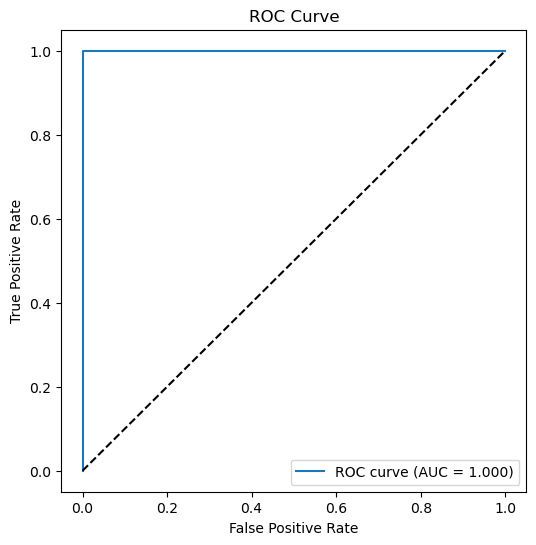

AUC training score: 1.000
Training Accuracy: 1.000


In [19]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

x_train_skf_final = x_train_const
y_train_skf_final = y_training_parts

#fit final logreg model
logreg_skf_model = sm.Logit(y_train_skf_final, x_train_skf_final)
logreg_skf_result = logreg_skf_model.fit(disp=False,  maxiter=100)

print(logreg_skf_result.summary())

#extract values for next steps
parameters_df = pd.DataFrame({'Feature': logreg_skf_result.params.index, 'Coefficient': logreg_skf_result.params.values, 'P-value': logreg_skf_result.pvalues.values})
print(parameters_df)

#predict probability and class 
y_pred_prob_training = logreg_skf_result.predict(x_train_skf_final)
y_pred_class_training = (y_pred_prob_training >= 0.5).astype(int)

#confusion matrix
training_cm = confusion_matrix(y_train_skf_final, y_pred_class_training)
training_cm_df = pd.DataFrame(training_cm, index=['Actual: Other(0)', 'Actual:Bending(1)'], columns=['Predicted: Other(0)', 'Predicted: Bending(1)'])
print(training_cm_df)

#-------------------------------------------------------------------------------------------#
#ROC, AUC, and p values
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_skf_final, y_pred_prob_training)
auc_train_score = roc_auc_score(y_train_skf_final, y_pred_prob_training)

plt.figure(figsize=(6,6))
plt.plot(fpr_train, tpr_train, label=f'ROC curve (AUC = {auc_train_score:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC training score: {auc_train_score:.3f}")
print(f"Training Accuracy: {accuracy_score(y_train_skf_final, y_pred_class_training):.3f}")

#### v. Test Classifier

In [26]:
#Test the classifier on the test set. Remember to break the time series in
#your test set into the same number of time series into which you broke your
#training set. Remember that the classifier has to be tested using the features
#extracted from the test set. Compare the accuracy on the test set with the
#cross-validation accuracy you obtained previously.

#identify best l 
best_result = skf_results_df.iloc[0]
best_l = int(best_result['l'])
best_p = int(best_result['p'])

print(f"\nBest (l,p) pair: l={best_l}, p={best_p}")
print(f"Cross-validation score: {best_result['score']:.4f}")

#generate features for best l
features_parts_df = break_time_series_for_l(dataframes, feature_columns, best_l)

#split into training/test using SAME split as before
test_instances_parts = features_parts_df['File Path'].isin(test_files)
training_data_parts = features_parts_df[~test_instances_parts].dropna()
test_data_parts = features_parts_df[test_instances_parts].dropna()

#training data
x_training_parts = training_data_parts.drop(columns=['Instance', 'File Path', 'label'])
x_training_parts = x_training_parts.dropna(axis=1)
y_training_parts = training_data_parts['label']

#test data
x_test_parts = test_data_parts.drop(columns=['Instance', 'File Path', 'label'])
x_test_parts = x_test_parts.dropna(axis=1)
y_test_parts = test_data_parts['label']

x_train_const = sm.add_constant(x_training_parts)
x_train_const = x_train_const.loc[:, ~x_train_const.columns.duplicated()]
x_train_const = x_train_const.loc[:, x_train_const.std() > 0]  #remove cols with no var
x_train_const = x_train_const.drop_duplicates()
y_training_parts = y_training_parts.loc[x_train_const.index]

#train RFE on ENTIRE training set with best p
whole_model = LogisticRegression(penalty='l2', C=1e10, solver='lbfgs', max_iter=100)
whole_rfe = RFE(whole_model, n_features_to_select=best_p)
whole_rfe.fit(x_train_const, y_training_parts)

#get selected/main features
selected_features = x_train_const.columns[whole_rfe.support_].tolist()
print(f"\nSelected features: {selected_features}")

#apply features to train and test
x_train_final = x_train_const[selected_features]
x_test_final = sm.add_constant(x_test_parts)
x_test_final = x_test_final[selected_features]

#final model
final_model = LogisticRegression(penalty='l2', C=1e10, solver='lbfgs', max_iter=100)
final_model.fit(x_train_final, y_training_parts)

y_pred_test_final = final_model.predict(x_test_final)

#evaluate on test
# Evaluate on test set
from sklearn.metrics import balanced_accuracy_score, accuracy_score, classification_report, confusion_matrix

test_accuracy = accuracy_score(y_test_parts, y_pred_test_final)
test_balanced_accuracy = balanced_accuracy_score(y_test_parts, y_pred_test_final)

print(f"\n=== Test Set Results ===")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Balanced Accuracy: {test_balanced_accuracy:.4f}")


Best (l,p) pair: l=1, p=36
Cross-validation score: 0.8917

Selected features: ['max1', 'mean1', 'std1', 'max2', 'mean2', 'std2', 'max3', 'mean3', 'std3', 'max4', 'mean4', 'std4', 'max5', 'mean5', 'std5', 'max6', 'mean6', 'std6']

=== Test Set Results ===
Test Accuracy: 1.0000
Test Balanced Accuracy: 1.0000


C:\Users\anast\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:300: UserWarning: Found n_features_to_select=36 > n_features=18. There will be no feature selection and all features will be kept.
  warnings.warn(


#### vi. Separation

Do your classes seem to be well-separated to cause instability in calculating
logistic regression parameters?

Yes, the classes seem to be well-separated now seeing as there are no longer any convergence warnings or perfect/near-perfect separation warnings. We have a high cross-validation score of 0.8917 as well which suggests resonable separation as well. 

#### vii. Imbalance

label
0    57
1     8
Name: count, dtype: int64

Class Other: 57
Class Bending: 8
Classes are imbalenced. Proceed with case-control sampling...
Case Control Adjustment: p values and coefficients
   Feature  Coefficient   P-value
0     max1    18.129852       NaN
1    mean1   -16.944824       NaN
2     std1     5.445729       NaN
3     max2   -32.652166       NaN
4    mean2    26.225716  1.000000
5     std2    74.120609  1.000000
6     max3   -12.862624  0.999999
7    mean3     3.519794       NaN
8     std3    25.623146  1.000000
9     max4    -6.182078       NaN
10   mean4     2.590214       NaN
11    std4    -5.715160  1.000000
12    max5     7.017561  1.000000
13   mean5     2.723642  1.000000
14    std5   -30.842093       NaN
15    max6     0.419370  1.000000
16   mean6    18.974716       NaN
17    std6   -24.927201       NaN
Confusion matrix: [[8 0]
 [0 8]]

AUC score: 1.000


C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\anast\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\anast\anaconda3

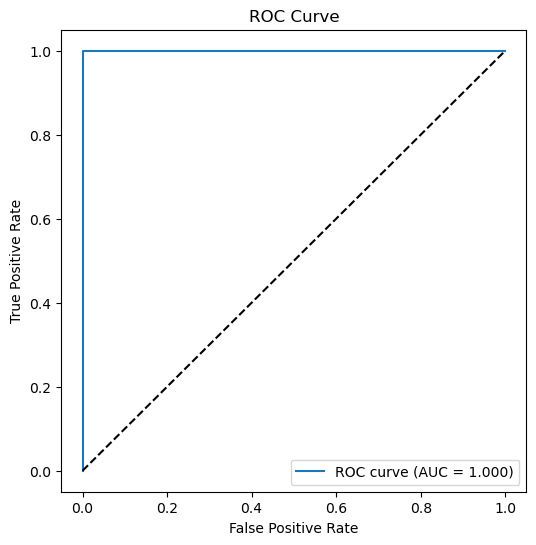

In [29]:
#From the confusion matrices you obtained, do you see imbalanced classes?
#If yes, build a logistic regression model based on case-control sampling and
#adjust its parameters. Report the confusion matrix, ROC, and AUC of the
#model.

#check for class imabalance
print(y_training_parts.value_counts())
print(f"\nClass Other: {(y_training_parts == 0).sum()}")
print(f"Class Bending: {(y_training_parts == 1).sum()}")

print("Classes are imbalenced. Proceed with case-control sampling...")

#--------------------------------------------------------------------------------------------#
training_df = pd.DataFrame(x_train_const)
training_df['label'] = y_training_parts.values

#separating majority/minority classes
major_df = training_df[training_df['label'] == 0]
minor_df = training_df[training_df['label'] == 1]

#downsample majority class
downsample_major_df = resample(major_df, replace=False, n_samples=len(minor_df), random_state=42)

#combine minority with downsampled majority
balanced_df = pd.concat([downsample_major_df, minor_df])

#shuffle
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

#split into x and y
x_balanced = balanced_df.drop(columns=['label'])
y_balanced = balanced_df['label']

#fit new logreg model
balanced_model = sm.Logit(y_balanced, x_balanced)
balanced_results = balanced_model.fit(disp=False, maxiter=100)

#case-control adjustment
pop = (y_training_parts == 1).sum() / len(y_training_parts)
sample = 0.5
correct = np.log(pop / (1 - pop)) - np.log(sample / (1 - sample))

#parameters and p values for balanced model
print("Case Control Adjustment: p values and coefficients")
params_balanced_df = pd.DataFrame({'Feature': balanced_results.params.index, 'Coefficient': balanced_results.params.values, 'P-value': balanced_results.pvalues.values})
print(params_balanced_df)

#Confusion matrix, ROC, and AUC on balanced training set
y_pred_prob_balanced = balanced_results.predict(x_balanced)
y_pred_class_balanced = (y_pred_prob_balanced >= 0.5).astype(int)

cm_balanced = confusion_matrix(y_balanced, y_pred_class_balanced)
print("Confusion matrix:", cm_balanced)

fpr_balanced, tpr_balanced, _ = roc_curve(y_balanced, y_pred_prob_balanced)
auc_balanced = roc_auc_score(y_balanced, y_pred_prob_balanced)

print(f"\nAUC score: {auc_balanced:.3f}")

plt.figure(figsize=(6,6))
plt.plot(fpr_balanced, tpr_balanced, label=f'ROC curve (AUC = {auc_balanced:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### (b) Binary Classification Using L1-penalized logistic regression

#### i. Time Series Segments

In [43]:
#Repeat 2(a)iii using L1-penalized logistic regression, i.e. instead of using pvalues
#for variable selection, use L1 regularization. Note that in this problem,
#you have to cross-validate for both l, the number of time series into which you
#break each of your instances, and L, the weight of L1 penalty in your logistic
#regression objective function (or C, the budget). Packages usually perform
#cross-validation for L automatically.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report

#pull training files
all_files = list(dataframes.keys()) 
training_files = [f for f in all_files if f not in test_files]

#C values for regularization
C_vals = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
l_vals = (1,21)

print("Processing L1 Penalized Logistic Regression")
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

l1_results = []

for l in l_vals:
    print(f"Processing l={l}")

    l_features_df = break_time_series_for_l(dataframes, feature_columns, l)

    #training data
    train_instances = l_features_df['File Path'].isin(training_files)
    l_training_data = l_features_df[train_instances].dropna()

    xl = l_training_data.drop(columns=['Instance', 'File Path', 'label'])
    xl = xl.dropna(axis=1)
    yl = l_training_data['label']

    xl_const = sm.add_constant(xl)
    xl_const = xl_const.loc[:, ~xl_const.columns.duplicated()]
    xl_const = xl_const.loc[:, xl_const.std() >0]
    yl = yl.loc[xl_const.index]

    for C in C_vals:
        cv_scores = []
        n_features_selected = []

        #cross validation
        for train_idx, val_idx in skf.split(xl_const, yl):
            x_train_cv = xl_const.iloc[train_idx]
            x_cv = xl_const.iloc[val_idx]
            y_train_cv = yl.iloc[train_idx]
            y_cv = yl.iloc[val_idx]

            #train L1 model
            l1_model = LogisticRegression(penalty='l1', C=C, solver='liblinear', max_iter=1000, random_state=42)
            try:
                l1_model.fit(x_train_cv, y_train_cv)

                #predict
                y_pred_cv = l1_model.predict(x_cv)
                cv_score = balanced_accuracy_score(y_cv, y_pred_cv)
                cv_scores.append(cv_score)

                #count selected features
                n_selected = np.sum(l1_model.coef_[0] != 0)
                n_features_selected.append(n_selected)
            except Exception as e:
                print(f" Warning: Failed for {l}, {C}: {e}")
                continue
        if cv_scores:
            avg_cv_score = np.mean(cv_scores)
            avg_cv_features = np.mean(n_features_selected)

            l1_results.append({'l':l, 'C':C, 'cv_score': avg_cv_score, 'avg_features_selected': avg_cv_features, 'n_folds': len(cv_scores)})

#build results df
l1_results_df = pd.DataFrame(l1_results)
l1_results_df = l1_results_df.sort_values('cv_score', ascending=False).reset_index(drop=True)
print(l1_results_df.head(10))

best_l1 = l1_results_df.iloc[0]
print(f"l={best_l1['l']}, C={best_l1['C']}")


Processing L1 Penalized Logistic Regression
Processing l=1
Processing l=21
    l        C  cv_score  avg_features_selected  n_folds
0   1    1.000  0.891667                    5.8        5
1   1   10.000  0.891667                    6.2        5
2   1  100.000  0.883333                    8.2        5
3   1    0.100  0.850000                    4.8        5
4  21    0.100  0.850000                    5.4        5
5  21  100.000  0.841667                  106.6        5
6  21   10.000  0.841667                   33.4        5
7  21    1.000  0.841667                   12.6        5
8   1    0.001  0.500000                    0.0        5
9   1    0.010  0.500000                    1.4        5
l=1.0, C=1.0


#### ii. Comparison

In [47]:
#Compare the L1-penalized with variable selection using p-values. Which one
#performs better? Which one is easier to implement?

print("L1 penalized logistic regression is easier to implement.")

#compare reuslts
best_l1 = l1_results_df.iloc[0]
best_rfe = skf_results_df.iloc[0]

print("l1=", best_l1, "rfe=", best_rfe)
score_difference = best_l1['cv_score'] - best_rfe['score']

print(score_difference)
print("Neither performs better. The difference between the scores based on p-value is 0.")

L1 penalized logistic regression is easier to implement.
l1= l                        1.000000
C                        1.000000
cv_score                 0.891667
avg_features_selected    5.800000
n_folds                  5.000000
Name: 0, dtype: float64 rfe= l         1.000000
p        36.000000
score     0.891667
Name: 0, dtype: float64
0.0
Neither performs better. The difference between the scores based on p-value is 0.


### (c) Multi-class Classification (The Realistic Case)

#### i. Time Series Segments

In [53]:
#Find the best l in the same way as you found it in 2(b)i to build an L1-penalized multinomial regression 
#model to classify all activities in your training set. Report your test error. Research how confusion matrices and ROC
#curves are defined for multiclass classification and show them for this problem if possible.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, 
                             confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)
from sklearn.preprocessing import label_binarize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Search best (l,c) combination
l_values = range(1,21)
c_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

#cross validation setup
n_splits = 5
multi_skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
multi_results = []

for l in l_values:
    print(f"Processing l={l}")

    #break time series for l
    l_features_df = break_time_series_for_l(dataframes, feature_columns, l)

    #training data
    train_instances = l_features_df['File Path'].isin(training_files)
    l_training_data = l_features_df[train_instances].dropna()

    #labels and features
    x_l = l_training_data.drop(columns=['Instance', 'File Path', 'label'])
    x_l = x_l.dropna(axis=1)
    y_l = l_training_data['label']

    #check for unique classes
    unique_classes = y_l.unique()
    n_classes = len(unique_classes)

    #add x constant
    x_l_const = sm.add_constant(x_l)
    x_l_const = x_l_const.loc[:, ~x_l_const.columns.duplicated()]
    x_l_const = x_l_const.loc[:, x_l_const.std() > 0 ]
    x_l_const = x_l_const.drop_duplicates()
    y_l = y_l.loc[x_l_const.index]

    #pair c values
    for C in c_values:
        cv_multi_scores = []
        n_features_selected = []

        #cross validation
        for train_idx, val_idx in skf.split(x_l_const, y_l):
            x_train_cv = x_l_const.iloc[train_idx]
            x_cv = x_l_const.iloc[val_idx]
            y_train_cv = y_l.iloc[train_idx]
            y_cv = y_l.iloc[val_idx]

            #train L1 multiclass model
            multi_model = LogisticRegression(penalty='l1', C=C, solver='saga', multi_class='multinomial', max_iter=1000, random_state=42, n_jobs=-1)
            multi_model.fit(x_train_cv, y_train_cv)

            y_pred_cv = multi_model.predict(x_cv)
            multi_score = balanced_accuracy_score(y_cv, y_pred_cv)
            cv_multi_scores.append(multi_score)

            #count non-zero coefficients across all classes
            n_selected = np.sum(np.any(multi_model.coef_ != 0, axis=0))
            n_features_selected.append(n_selected)

        if cv_scores:
            avg_multi_cv = np.mean(cv_multi_scores)
            avg_multi_features = np.mean(n_features_selected)

            multi_results.append({'l':l, 'C': C, 'cv_multi_score': avg_multi_cv, 'avg_multi_features': avg_multi_features, 'n_folds': len(cv_multi_scores), 'n_classes': n_classes})

#final df
multi_results_df = pd.DataFrame(multi_results)
multi_results_df = multi_results_df.sort_values('cv_multi_score', ascending=False).reset_index(drop=True)
print(multi_results_df.head(10).to_string(index=False))
print("Best multiclass model")    


Processing l=1


C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_clas

Processing l=2


C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning

Processing l=3


C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_clas

Processing l=4


C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_clas

Processing l=5


C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_clas

Processing l=6


C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_clas

Processing l=7


C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_clas

Processing l=8


C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_clas

Processing l=9


C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_clas

Processing l=10


C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_clas

Processing l=11


C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_clas

Processing l=12


C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_clas

Processing l=13


C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_clas

Processing l=14


C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_clas

Processing l=15


C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_clas

Processing l=16


C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_clas

Processing l=17


C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_clas

Processing l=18


C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_clas

Processing l=19


C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_clas

Processing l=20


C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_clas

 l     C  cv_multi_score  avg_multi_features  n_folds  n_classes
 1   1.0        0.891667                 6.8        5          2
 1  10.0        0.891667                17.2        5          2
 1 100.0        0.891667                18.0        5          2
 4 100.0        0.891667                72.0        5          2
 3   1.0        0.891667                15.2        5          2
 2 100.0        0.891667                36.0        5          2
 2  10.0        0.891667                32.6        5          2
 2   1.0        0.891667                12.4        5          2
 4  10.0        0.891667                64.6        5          2
 4   1.0        0.891667                21.8        5          2
Best multiclass model


C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [63]:

#---------------------------------train final multi model------------------------------------#
best_multiclass = multi_results_df.iloc[0]
best_l_multi = int(best_multiclass['l'])
best_c_multi = best_multiclass['C']

features_multi_df = break_time_series_for_l(dataframes, feature_columns, best_l_multi)

#test/train split
test_instances_multi = features_multi_df['File Path'].isin(test_files)
train_data_multi = features_multi_df[~test_instances_multi].dropna()
test_data_multi = features_multi_df[test_instances_multi].dropna()

x_train_multi = train_data_multi.drop(columns=['Instance', 'File Path', 'label'])
x_train_multi = x_train_multi.dropna(axis=1)
y_train_multi = train_data_multi['label']

x_test_multi = test_data_multi.drop(columns=['Instance', 'File Path', 'label'])
x_test_multi = x_test_multi.dropna(axis=1)
y_test_multi = test_data_multi['label']

x_train_multi_const = sm.add_constant(x_train_multi)
x_test_multi_const = sm.add_constant(x_test_multi)
x_test_multi_const = x_test_multi_const[x_train_multi_const.columns]

#final multi model
final_multi_model = LogisticRegression(penalty='l1', C=best_c_multi, solver='saga', multi_class='multinomial', max_iter=2000, random_state=42, n_jobs=-1)
final_multi_model.fit(x_train_multi_const, y_train_multi)

#Test set final predictions
y_pred_multi = final_multi_model.predict(x_test_multi_const)
y_pred_multi_prob = final_multi_model.predict_proba(x_test_multi_const)

#calculate test error
test_error = 1 - accuracy_score(y_test_multi, y_pred_multi)
print(f"\nTest Error: {test_error:.4f}")

#Confusion Matrix
cm_multi = confusion_matrix(y_test_multi, y_pred_multi)
class_names = final_multi_model.classes_
print("Confusion Matrix:", cm_multi)

#ROC Curve
y_test_binary = label_binarize(y_test_multi, classes = class_names)
n_classes = len(class_names)

fpr = dict()
tpr = dict()

fpr, tpr, _ = roc_curve(y_test_multi, y_pred_multi_prob[:, 1])
print(f"\nROC Curve (Class {class_names[1]} vs Class {class_names[0]}):")
print(f"  {'FPR':<10} {'TPR':<10}")
for j in range(min(10, len(fpr))):
    print(f"  {fpr[j]:<10.4f} {tpr[j]:<10.4f}")
if len(fpr) > 10:
    print(f"  ... ({len(fpr)-10} more points)")

C:\Users\anast\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(



Test Error: 0.0000
Confusion Matrix: [[15  0]
 [ 0  4]]

ROC Curve (Class 1 vs Class 0):
  FPR        TPR       
  0.0000     0.0000    
  0.0000     0.2500    
  0.0000     1.0000    
  1.0000     1.0000    


#### ii. Naive Bayes

In [70]:
#Repeat 2(c)i using a Naive Bayes' classifier. Use both Gaussian and Multinomial
#priors and compare the results.

#Using best l from previous analysis: l={best_l_multi}
nb_features_df = break_time_series_for_l(dataframes, feature_columns, best_l_multi)

#split test/train
nb_test_instances = nb_features_df['File Path'].isin(test_files)
nb_training_data = nb_features_df[~nb_test_instances].dropna()
nb_test_data = nb_features_df[nb_test_instances].dropna()

nb_x_train = nb_training_data.drop(columns=['Instance', 'File Path', 'label'])
nb_x_train = nb_x_train.dropna(axis=1)
nb_y_train = nb_training_data['label']

nb_x_test = nb_test_data.drop(columns=['Instance', 'File Path', 'label'])
nb_x_test = nb_x_test.dropna(axis=1)
nb_y_test = nb_test_data['label']

nb_x_test = nb_x_test[nb_x_train.columns]

#---------------------------------------------------------------------------------------#
#train gaussian naive bayes
gaussian_model = GaussianNB()
gaussian_model.fit(nb_x_train, nb_y_train)

#predict on gaussian model
y_pred_gaus = gaussian_model.predict(nb_x_test)
y_pred_prob_gaus = gaussian_model.predict_proba(nb_x_test)

#find test error
test_err_gaus = 1 - accuracy_score(nb_y_test, y_pred_gaus)
print(f"\nTest Error Gaussian: {test_err_gaus:.4f}")

#=-------------------------------------------------------------------------------------#
#train multinomial naive bayes
scaler = MinMaxScaler()
x_train_nb_scaled = scaler.fit_transform(nb_x_train)
x_test_nb_scaled = scaler.transform(nb_x_test)

#train model
multi_nb_model = MultinomialNB()
multi_nb_model.fit(x_train_nb_scaled, nb_y_train)

y_pred_multi_nb = multi_nb_model.predict(x_test_nb_scaled)
y_pred_prob_nb = multi_nb_model.predict_proba(x_test_nb_scaled)

#test error
test_err_multi_nb = 1 - accuracy_score(nb_y_test, y_pred_multi_nb)
print(f"\nTest Error Multinomial: {test_err_multi_nb:.4f}")

#---------------------------------------------------------------------------------------#
#compare test errors
if test_err_gaus < test_err_multi_nb:
    print("Gaussian naive bayes performs better than the multinomial naive bayes.")
else:
    print("Multinomial naive bayes performs better than the gaussian naive bayes.")

#confusion matrices
class_names_nb = gaussian_model.classes_
cm_gaussian = confusion_matrix(nb_y_test, y_pred_gaus)
print(cm_gaussian)

cm_multi = confusion_matrix(nb_y_test, y_pred_multi_nb)
print(cm_multi)



Test Error Gaussian: 0.0000

Test Error Multinomial: 0.2105
Gaussian naive bayes performs better than the multinomial naive bayes.
[[15  0]
 [ 0  4]]
[[15  0]
 [ 4  0]]


#### ii. Comparison

Which method is better for multi-class classification in this problem?

The Gaussian Naive Bayes is better for multiclass classification since it has a lower test error.

#REFERENCES#

https://stackoverflow.com/questions/3451111/unzipping-files-in-python

https://docs.python.org/3/library/zipfile.html

https://realpython.com/python-zipfile/

https://pandas.pydata.org/docs/reference/api/pandas.concat.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://www.geeksforgeeks.org/machine-learning/understanding-feature-importance-in-logistic-regression-models/

#copilot: creating function to extract features in loop

#copilot: how to bootstrap with resampling? 

#copilot: why did my logistic regression failed to converge? what does perfect separation warning mean? 

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

#copilot: how to split time series data into equal segments? 

#copilot: how to loop through multiple values to segment data? 

https://scikit-learn.org/stable/modules/cross_validation.html

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html

https://www.geeksforgeeks.org/machine-learning/recursive-feature-elimination-with-cross-validation-in-scikit-learn/

#copilot: how to get pvalues from logistic regression model? 

https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html

https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

https://www.geeksforgeeks.org/machine-learning/auc-roc-curve/

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

#copilot: how to calculate ROC and confusion matrix for multiclass classification model?

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

https://www.geeksforgeeks.org/machine-learning/gaussian-naive-bayes-using-sklearn/

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

https://stackoverflow.com/questions/66036037/how-do-i-fit-a-multinomial-naive-bayes-classifier-with-multiple-features-in-sci

#copilot: how to build a LaTeX-formatted markdown cell in jupyter notebook